In [29]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from PIL import Image

In [30]:
class AE(nn.Module):
    def __init__(self,input_dimension,hidden_dimension):
        super().__init__()
        self.input_dimension=input_dimension
        self.hidden_dimension=hidden_dimension

        # Define the encoder network
        self.encoder = nn.Sequential(
            nn.Linear(self.input_dimension, 128),
            nn.ReLU(),
            nn.Linear(128, self.hidden_dimension),
            nn.ReLU(),
        )

        # Define the decoder network
        self.decoder = nn.Sequential(
            nn.Linear(self.hidden_dimension, 128),
            nn.ReLU(),
            nn.Linear(128, self.input_dimension),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # Encode the input

        encoded_x = self.encoder(x)

        # Decode the latent space
        x_recon = self.decoder(encoded_x)

        return x_recon


In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_dimension = 784
epochs = 10
batch_size=20

In [32]:
# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [33]:
# Define test function

def train_ae(epochs, ae_model, optimizer):
    # outputs = []
    # losses = []
    # Start training
    loss_list=[]
    for epoch in range(epochs):
        train_loss=0
        for (x, _) in train_loader:
            # Forward pass
            x = x.to(device).view(-1, input_dimension)
            x_recon = ae_model(x)

            # Compute the loss
            loss_function = torch.nn.MSELoss()
            loss = loss_function(x_recon,x)
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Storing the losses in a list for plotting
            train_loss+=loss.item()
            # losses.append(loss)
            # outputs.append((epochs, x, x_recon))
            # Print the loss
        loss_list.append(train_loss)
        print("Epoch [{}/{}], Train Loss: {:.4f}".format(epoch+1, epochs, train_loss))
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(loss_list)
    plt.show()

In [34]:
# Define test function

def test_ae(epochs, ae_model):
    # outputs = []
    # losses = []
    # Start training
    loss_list=[]
    for epoch in range(epochs):
        test_loss=0
        for (x, _) in test_loader:
            # Forward pass
            x = x.to(device).view(-1, input_dimension)
            x_recon = ae_model(x)

            # Compute the loss
            loss_function = torch.nn.MSELoss()
            loss = loss_function(x_recon,x) 
            test_loss+=loss.item()
            # losses.append(loss)
            # outputs.append((epochs, x, x_recon))
            # Print the loss
        loss_list.append(test_loss)
        print("Epoch [{}/{}], Test Loss: {:.4f}".format(epoch+1, epochs, test_loss))
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(loss_list)
    plt.show()

Epoch [1/10], Train Loss: 344.4968
Epoch [2/10], Train Loss: 172.1888
Epoch [3/10], Train Loss: 114.7925
Epoch [4/10], Train Loss: 86.0944
Epoch [5/10], Train Loss: 68.8755
Epoch [6/10], Train Loss: 57.3963
Epoch [7/10], Train Loss: 49.1968
Epoch [8/10], Train Loss: 43.0472
Epoch [9/10], Train Loss: 38.2642
Epoch [10/10], Train Loss: 34.4378



------------------------------------------------------------



Epoch [1/10], Test Loss: 57.7913
Epoch [2/10], Test Loss: 28.8956
Epoch [3/10], Test Loss: 19.2638
Epoch [4/10], Test Loss: 14.4478
Epoch [5/10], Test Loss: 11.5583
Epoch [6/10], Test Loss: 9.6319
Epoch [7/10], Test Loss: 8.2559
Epoch [8/10], Test Loss: 7.2239
Epoch [9/10], Test Loss: 6.4213
Epoch [10/10], Test Loss: 5.7791


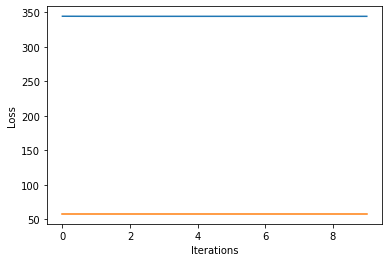

In [35]:
# Initialize Model 
hidden_dimension = 32

ae = AE(input_dimension,hidden_dimension)
#MSE Loss function
optimizer = torch.optim.Adam(ae.parameters(),lr = 0.1)
train_ae(epochs,ae,optimizer)
print('\n\n\n------------------------------------------------------------\n\n\n')
test_ae(epochs,ae)

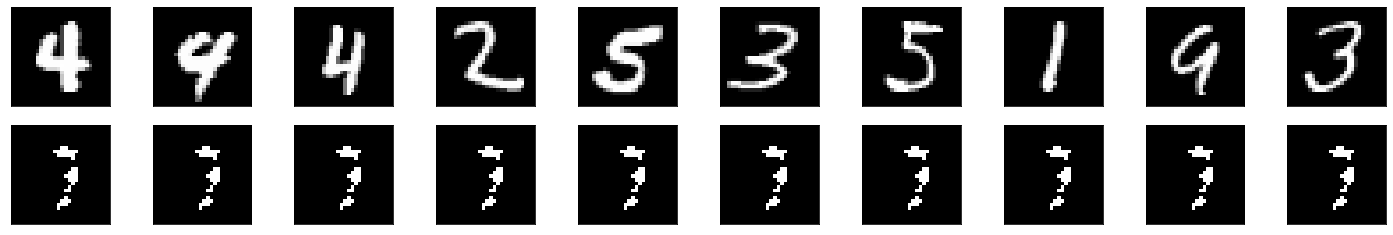

In [36]:
# obtain one batch of test imgs
dataiter = iter(test_loader)
imgs, labels =next(dataiter)

input = imgs.view(imgs.size(0), -1)
output = ae(input)
imgs = imgs.numpy()
output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input imgs on top row, reconstructions on bottom
for ims, row in zip([imgs, output], axes):
    for img, ax in zip(imgs, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [37]:
# Initialize Model 
hidden_dimension = 64

ae = AE(input_dimension,hidden_dimension)
#MSE Loss function
optimizer = torch.optim.Adam(ae.parameters(),lr = 0.1)
train_ae(epochs,ae,optimizer)
print('\n\n\n------------------------------------------------------------\n\n\n')
test_ae(epochs,ae)

Epoch [1/10], Train Loss: 345.6010
Epoch [2/10], Train Loss: 172.7360
Epoch [3/10], Train Loss: 115.1573
Epoch [4/10], Train Loss: 86.3680


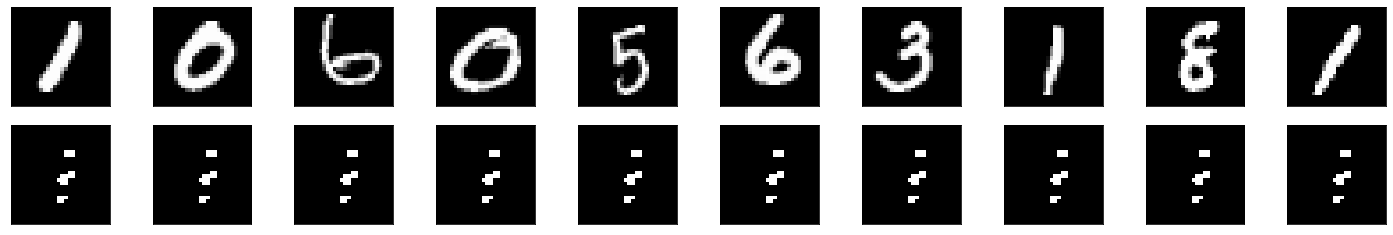

In [ ]:

# obtain one batch of test imgs
dataiter = iter(test_loader)
imgs, labels = next(dataiter)

input = imgs.view(imgs.size(0), -1)
output = ae(input)
imgs = imgs.numpy()
output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))
for imgs, row in zip([imgs, output], axes):
    for img, ax in zip(imgs, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)